# SML Classification
Trying to use different techniques to do classification. The idea is to use weather features to classify if there is rain or not.


In [75]:
import pandas as pd
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [76]:
df = pd.read_csv("https://raw.githubusercontent.com/emanueledellavalle/streaming-data-analytics/main/codes/SML/datasets/NEweather.csv")

In [77]:
df.head()

,temp,dew_pnt,sea_lvl_press,visibility,avg_wind_spd,max_sustained_wind_spd,max_temp,min_temp,rain
0,19.8,14.0,1019.6,8.4,9.9,15.9,28.9,14.0,0
1,26.8,22.2,1006.2,8.1,10.9,19.0,34.0,21.0,0
2,34.6,32.9,1004.6,3.9,13.8,22.0,36.0,33.1,1
3,26.4,21.5,1006.9,8.0,18.7,30.1,39.9,16.0,1
4,14.7,7.9,1009.9,8.1,14.1,22.0,21.0,9.0,0


In [78]:
from river.stream import iter_pandas
from river.metrics import Accuracy,BalancedAccuracy,CohenKappa,GeometricMean
from river.metrics.base import Metrics
from river.evaluate import progressive_val_score

In [79]:
df.shape

(18159, 9)

In [80]:
features = df.columns[:-1]
print(features)
print(features.shape)

Index(['temp', 'dew_pnt', 'sea_lvl_press', 'visibility', 'avg_wind_spd',
       'max_sustained_wind_spd', 'max_temp', 'min_temp'],
      dtype='object')
(8,)


In [81]:
df["rain"]

0        0
1        0
2        1
3        1
4        0
        ..
18154    1
18155    0
18156    0
18157    0
18158    0
Name: rain, Length: 18159, dtype: int64

# EDA

In [82]:
df.describe()

,temp,dew_pnt,sea_lvl_press,visibility,avg_wind_spd,max_sustained_wind_spd,max_temp,min_temp,rain
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,51.006124,39.737849,1016.762404,11.655036,7.015094,14.022432,62.033149,42.468704,0.313784
std,21.147466,20.080543,47.697233,3.941030,3.656144,5.321651,22.181360,20.442788,0.464042
min,-11.700000,-25.700000,980.200000,0.100000,0.100000,1.900000,-8.900000,-22.000000,0.000000
25%,34.600000,25.300000,1011.400000,9.300000,4.400000,10.100000,44.100000,28.000000,0.000000
50%,53.000000,39.700000,1015.900000,11.400000,6.400000,13.000000,64.900000,43.000000,0.000000
75%,69.600000,57.450000,1020.800000,14.500000,9.000000,17.100000,81.000000,60.100000,1.000000
max,92.500000,77.600000,5503.800000,24.900000,28.000000,49.000000,109.000000,82.900000,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    18159 non-null  float64
 1   dew_pnt                 18159 non-null  float64
 2   sea_lvl_press           18159 non-null  float64
 3   visibility              18159 non-null  float64
 4   avg_wind_spd            18159 non-null  float64
 5   max_sustained_wind_spd  18159 non-null  float64
 6   max_temp                18159 non-null  float64
 7   min_temp                18159 non-null  float64
 8   rain                    18159 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [84]:
df.duplicated().sum()

0

In [85]:
df["rain"].value_counts()


0    12461
1     5698
Name: rain, dtype: int64

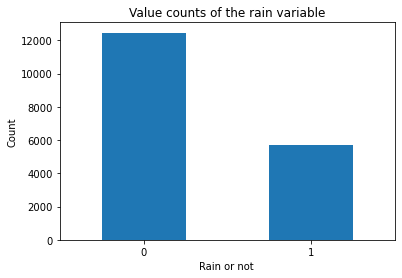

In [86]:
df["rain"].value_counts().plot(kind="bar")
plt.title("Value counts of the rain variable")
plt.xlabel("Rain or not ")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

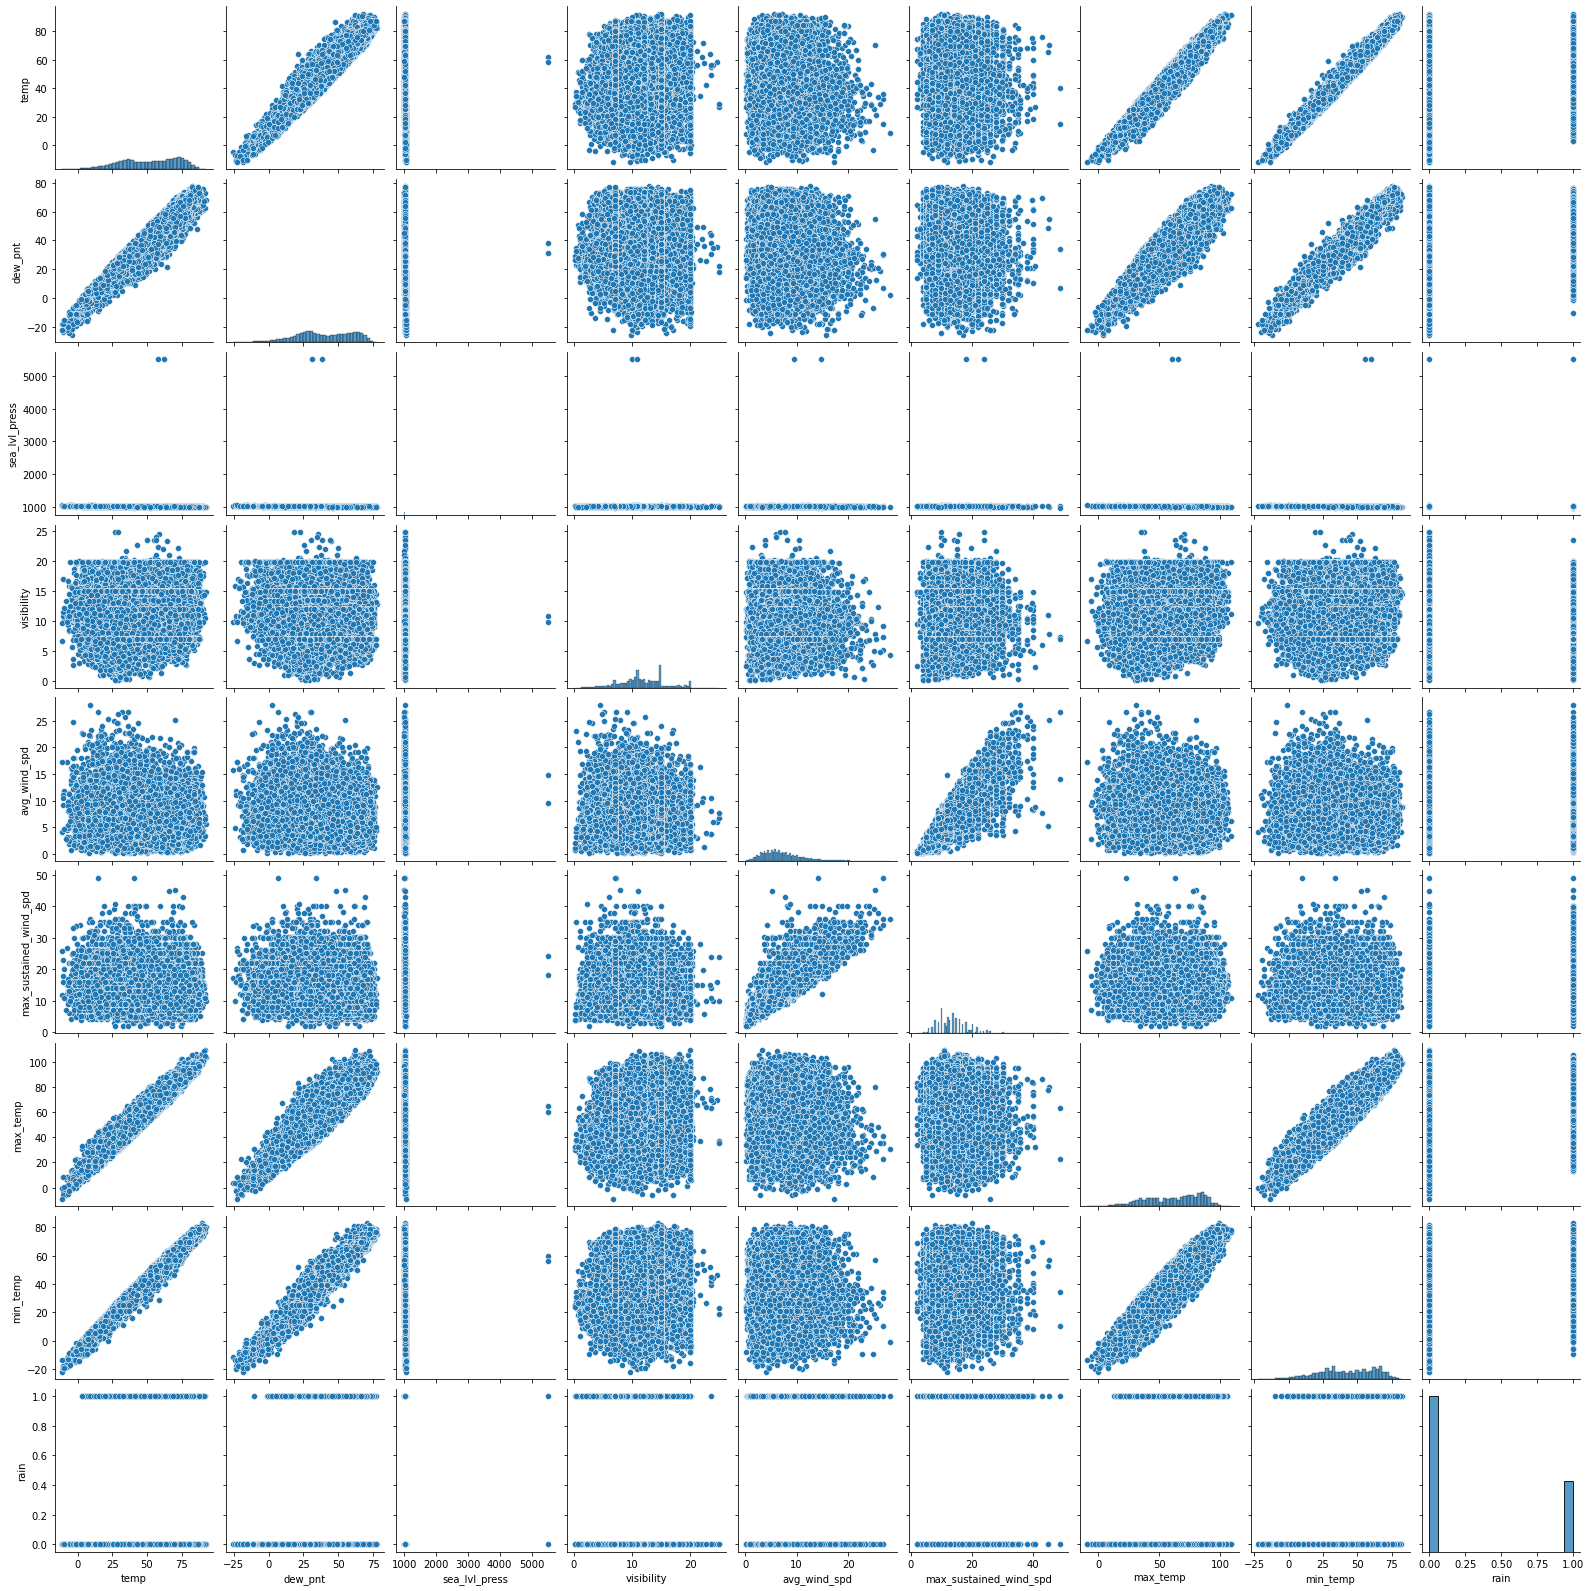

In [87]:
sns.pairplot(df)

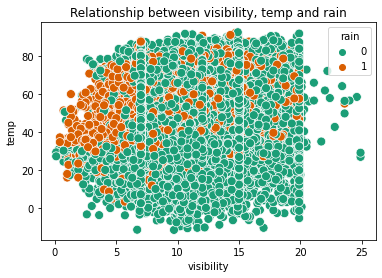

In [88]:
sns.scatterplot(x="visibility", y="temp", hue="rain", data=df, palette="Dark2", s=80)
plt.title("Relationship between visibility, temp and rain")
plt.show()

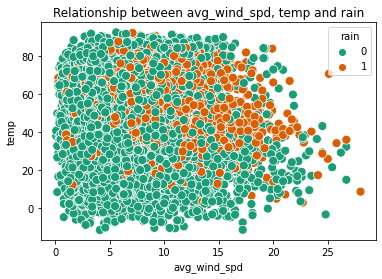

In [89]:
sns.scatterplot(x="avg_wind_spd", y="temp", hue="rain", data=df, palette="Dark2", s=80)
plt.title("Relationship between avg_wind_spd, temp and rain")
plt.show()

# Classification

In [90]:
# Divide x and y

data_stream = iter_pandas(X= df[features] , y = df["rain"])

## Naive Bayes

In [91]:
from river.naive_bayes import GaussianNB

model = GaussianNB()


metrics = Metrics(metrics=[Accuracy(),BalancedAccuracy(),GeometricMean(),CohenKappa()])

progressive_val_score(dataset=data_stream,
                      model=model,
                      metric=metrics,
                      print_every=500)

[500] Accuracy: 75.35%, BalancedAccuracy: 71.74%, GeometricMean: 71.23%, CohenKappa: 42.00%
[1,000] Accuracy: 71.27%, BalancedAccuracy: 71.96%, GeometricMean: 71.93%, CohenKappa: 40.19%
[1,500] Accuracy: 70.65%, BalancedAccuracy: 71.18%, GeometricMean: 71.16%, CohenKappa: 37.89%
[2,000] Accuracy: 69.88%, BalancedAccuracy: 70.38%, GeometricMean: 70.37%, CohenKappa: 36.23%
[2,500] Accuracy: 68.15%, BalancedAccuracy: 69.36%, GeometricMean: 69.30%, CohenKappa: 33.74%
[3,000] Accuracy: 68.99%, BalancedAccuracy: 69.64%, GeometricMean: 69.62%, CohenKappa: 34.23%
[3,500] Accuracy: 69.08%, BalancedAccuracy: 69.83%, GeometricMean: 69.80%, CohenKappa: 34.70%
[4,000] Accuracy: 68.82%, BalancedAccuracy: 68.87%, GeometricMean: 68.87%, CohenKappa: 33.48%
[4,500] Accuracy: 69.42%, BalancedAccuracy: 68.42%, GeometricMean: 68.38%, CohenKappa: 33.32%
[5,000] Accuracy: 69.09%, BalancedAccuracy: 67.97%, GeometricMean: 67.92%, CohenKappa: 32.70%
[5,500] Accuracy: 69.12%, BalancedAccuracy: 67.97%, GeometricM

Accuracy: 69.21%, BalancedAccuracy: 66.27%, GeometricMean: 65.80%, CohenKappa: 31.28%

## KNN

In [98]:
from river.neighbors import KNNClassifier

In [104]:
model1 = KNNClassifier( n_neighbors = 5 , window_size = 50)

metrics = Metrics( metrics = [Accuracy(), BalancedAccuracy(), GeometricMean(), CohenKappa()])
data_stream = iter_pandas(X=df[features], y=df['rain'])

progressive_val_score(dataset = data_stream,
                      model = model1,
                      metric = metrics,
                      print_every = 500)

[500] Accuracy: 74.35%, BalancedAccuracy: 63.19%, GeometricMean: 57.42%, CohenKappa: 29.69%
[1,000] Accuracy: 73.87%, BalancedAccuracy: 68.27%, GeometricMean: 66.34%, CohenKappa: 38.08%
[1,500] Accuracy: 75.18%, BalancedAccuracy: 68.30%, GeometricMean: 66.01%, CohenKappa: 38.40%
[2,000] Accuracy: 75.79%, BalancedAccuracy: 68.29%, GeometricMean: 65.68%, CohenKappa: 38.81%
[2,500] Accuracy: 75.55%, BalancedAccuracy: 67.67%, GeometricMean: 64.79%, CohenKappa: 37.71%
[3,000] Accuracy: 75.96%, BalancedAccuracy: 67.11%, GeometricMean: 63.75%, CohenKappa: 36.91%
[3,500] Accuracy: 76.19%, BalancedAccuracy: 67.96%, GeometricMean: 64.98%, CohenKappa: 38.48%
[4,000] Accuracy: 75.82%, BalancedAccuracy: 67.70%, GeometricMean: 64.73%, CohenKappa: 37.85%
[4,500] Accuracy: 75.99%, BalancedAccuracy: 67.68%, GeometricMean: 64.61%, CohenKappa: 37.93%
[5,000] Accuracy: 75.24%, BalancedAccuracy: 67.18%, GeometricMean: 64.17%, CohenKappa: 36.69%
[5,500] Accuracy: 75.23%, BalancedAccuracy: 67.22%, GeometricM

Accuracy: 74.62%, BalancedAccuracy: 67.92%, GeometricMean: 65.49%, CohenKappa: 37.81%

## Hoeffding Tree

In [106]:
from river.tree import HoeffdingTreeClassifier

In [108]:
model2 = HoeffdingTreeClassifier()

metrics = Metrics( metrics = [Accuracy(),BalancedAccuracy(), GeometricMean(), CohenKappa()])

data_stream = iter_pandas(X= df[features], y=df['rain'])

progressive_val_score(dataset = data_stream,
                      metric = metrics,
                      model = model2,
                      print_every = 500)



[500] Accuracy: 74.55%, BalancedAccuracy: 69.73%, GeometricMean: 68.79%, CohenKappa: 38.90%
[1,000] Accuracy: 70.87%, BalancedAccuracy: 71.11%, GeometricMean: 71.10%, CohenKappa: 38.92%
[1,500] Accuracy: 70.38%, BalancedAccuracy: 70.55%, GeometricMean: 70.55%, CohenKappa: 36.98%
[2,000] Accuracy: 69.73%, BalancedAccuracy: 68.12%, GeometricMean: 68.01%, CohenKappa: 33.45%
[2,500] Accuracy: 69.91%, BalancedAccuracy: 64.61%, GeometricMean: 63.26%, CohenKappa: 28.92%
[3,000] Accuracy: 70.89%, BalancedAccuracy: 63.00%, GeometricMean: 60.16%, CohenKappa: 26.85%
[3,500] Accuracy: 70.62%, BalancedAccuracy: 61.37%, GeometricMean: 57.14%, CohenKappa: 24.28%
[4,000] Accuracy: 71.29%, BalancedAccuracy: 61.85%, GeometricMean: 57.40%, CohenKappa: 25.57%
[4,500] Accuracy: 71.95%, BalancedAccuracy: 62.34%, GeometricMean: 57.83%, CohenKappa: 26.74%
[5,000] Accuracy: 71.79%, BalancedAccuracy: 62.23%, GeometricMean: 57.58%, CohenKappa: 26.59%
[5,500] Accuracy: 71.99%, BalancedAccuracy: 62.19%, GeometricM

Accuracy: 73.55%, BalancedAccuracy: 65.87%, GeometricMean: 62.56%, CohenKappa: 34.07%

## Hoeffding Adaptive Tree

In [110]:
from river.tree import HoeffdingAdaptiveTreeClassifier

In [111]:
model3 = HoeffdingAdaptiveTreeClassifier()

metrics = Metrics( metrics = [Accuracy(),BalancedAccuracy(), GeometricMean(), CohenKappa()])

data_stream = iter_pandas(X= df[features], y=df['rain'])

progressive_val_score(dataset = data_stream,
                      metric = metrics,
                      model = model3,
                      print_every = 500)

[500] Accuracy: 71.54%, BalancedAccuracy: 57.71%, GeometricMean: 47.55%, CohenKappa: 18.20%
[1,000] Accuracy: 69.57%, BalancedAccuracy: 65.95%, GeometricMean: 65.12%, CohenKappa: 31.55%
[1,500] Accuracy: 69.65%, BalancedAccuracy: 66.74%, GeometricMean: 66.33%, CohenKappa: 31.80%
[2,000] Accuracy: 69.23%, BalancedAccuracy: 65.91%, GeometricMean: 65.38%, CohenKappa: 30.26%
[2,500] Accuracy: 69.35%, BalancedAccuracy: 62.79%, GeometricMean: 60.64%, CohenKappa: 25.90%
[3,000] Accuracy: 70.69%, BalancedAccuracy: 62.41%, GeometricMean: 59.25%, CohenKappa: 25.83%
[3,500] Accuracy: 71.79%, BalancedAccuracy: 63.91%, GeometricMean: 60.99%, CohenKappa: 29.01%
[4,000] Accuracy: 72.24%, BalancedAccuracy: 64.08%, GeometricMean: 60.90%, CohenKappa: 29.67%
[4,500] Accuracy: 72.99%, BalancedAccuracy: 64.47%, GeometricMean: 61.08%, CohenKappa: 30.78%
[5,000] Accuracy: 73.17%, BalancedAccuracy: 64.84%, GeometricMean: 61.49%, CohenKappa: 31.61%
[5,500] Accuracy: 73.43%, BalancedAccuracy: 65.29%, GeometricM

Accuracy: 73.55%, BalancedAccuracy: 67.82%, GeometricMean: 66.05%, CohenKappa: 36.72%

## Majority vote of models

In [127]:
from river import stream
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

X_usage = df[features].to_numpy()
y_usage = df['rain'].to_numpy()

dataset = stream.iter_array(X_usage,
                            y_usage,
                            feature_names=['temp', 'dew_pnt', 'sea_lvl_press', 'visibility', 'avg_wind_spd','max_sustained_wind_spd', 'max_temp', 'min_temp']
                           )

y_pred =[]
y_true = []

mod0= GaussianNB()
#mod0 = HoeffdingTreeClassifier()
mod1= KNNClassifier( n_neighbors = 5, window_size = 50)
mod2= HoeffdingAdaptiveTreeClassifier()

samples=0

for x,y in dataset:
    
    y_pred1 = mod0.predict_one(x)
    #print(y_pred1)
    mod0.learn_one(x,y)
    
    y_pred2 = mod1.predict_one(x)
    mod1.learn_one(x,y)
    
    y_pred3 = mod2.predict_one(x)
    mod2.learn_one(x,y)
    
    if y_pred1 is None or y_pred2 is None or y_pred3 is None:
        continue
        
    yp = y_pred1 + y_pred2 + y_pred3
    
    if yp >= 2:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
    y_true.append(y)
    
    if samples % 500 == 0:
        print('Accuracy after' + str(samples) + ' samples :'+ str(accuracy_score(y_true,y_pred)))
        print('Balanced Accuracy after' + str(samples) + ' samples :'+ str(balanced_accuracy_score(y_true,y_pred)))


    samples += 1


Accuracy after0 samples :1.0
Balanced Accuracy after0 samples :1.0
Accuracy after500 samples :0.7584830339321357
Balanced Accuracy after500 samples :0.6338531576908175
Accuracy after1000 samples :0.7302697302697303
Balanced Accuracy after1000 samples :0.6778777550556692
Accuracy after1500 samples :0.7435043304463691
Balanced Accuracy after1500 samples :0.677816133873253
Accuracy after2000 samples :0.7541229385307346
Balanced Accuracy after2000 samples :0.6763281169995642
Accuracy after2500 samples :0.7536985205917633
Balanced Accuracy after2500 samples :0.6695943417123041
Accuracy after3000 samples :0.7590803065644786
Balanced Accuracy after3000 samples :0.664832152633296
Accuracy after3500 samples :0.7623536132533562
Balanced Accuracy after3500 samples :0.67528442317916
Accuracy after4000 samples :0.7613096725818546
Balanced Accuracy after4000 samples :0.6747077007191824
Accuracy after4500 samples :0.7622750499888914
Balanced Accuracy after4500 samples :0.6728902727588686
Accuracy aft